In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='quality', ylabel='Count'>

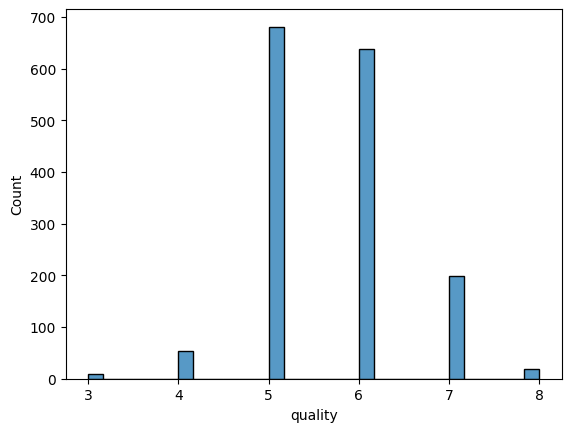

In [4]:
# start with target variable distribution to see if we have problems here
# sns.kdeplot(x="quality", data=df, fill=True)

# you can also use:
sns.histplot(x="quality", data=df)

## NEW COMPARISON ## - volatile acidity vs quality


<Figure size 1000x600 with 0 Axes>

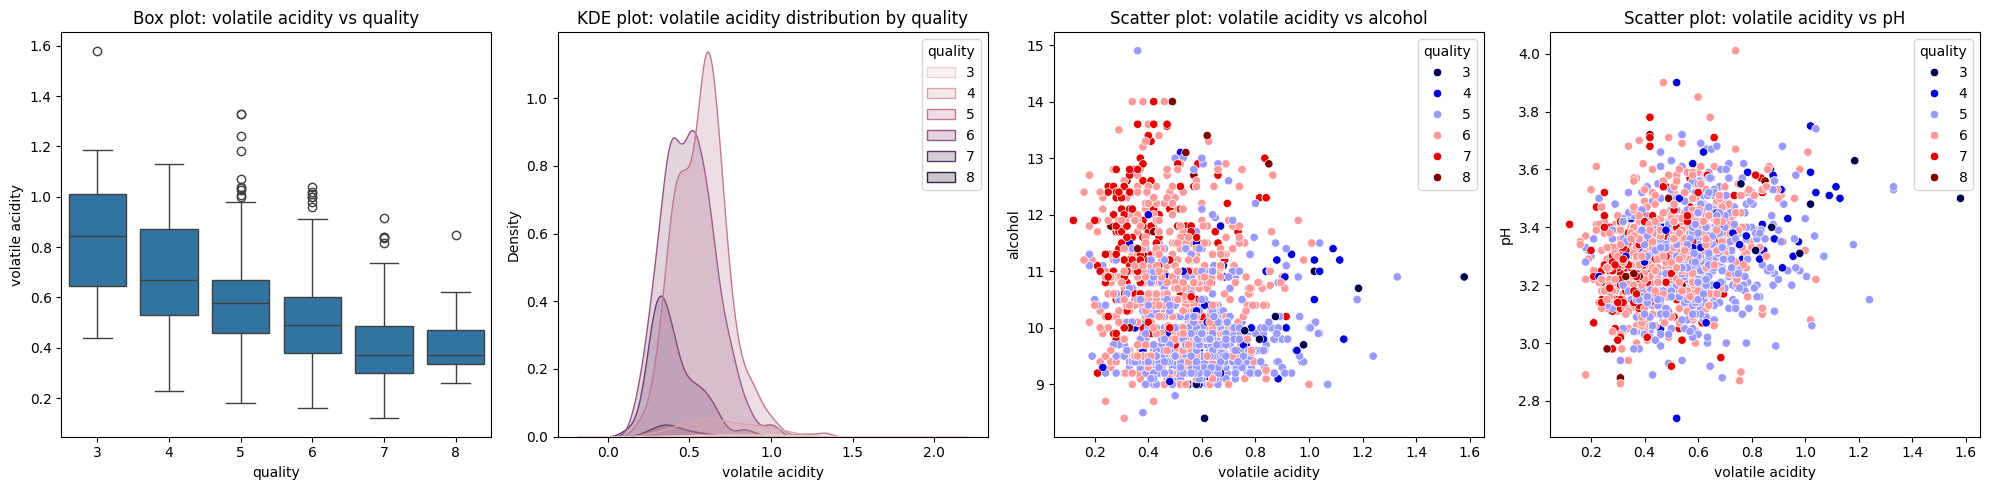

## NEW COMPARISON ## - alcohol vs quality


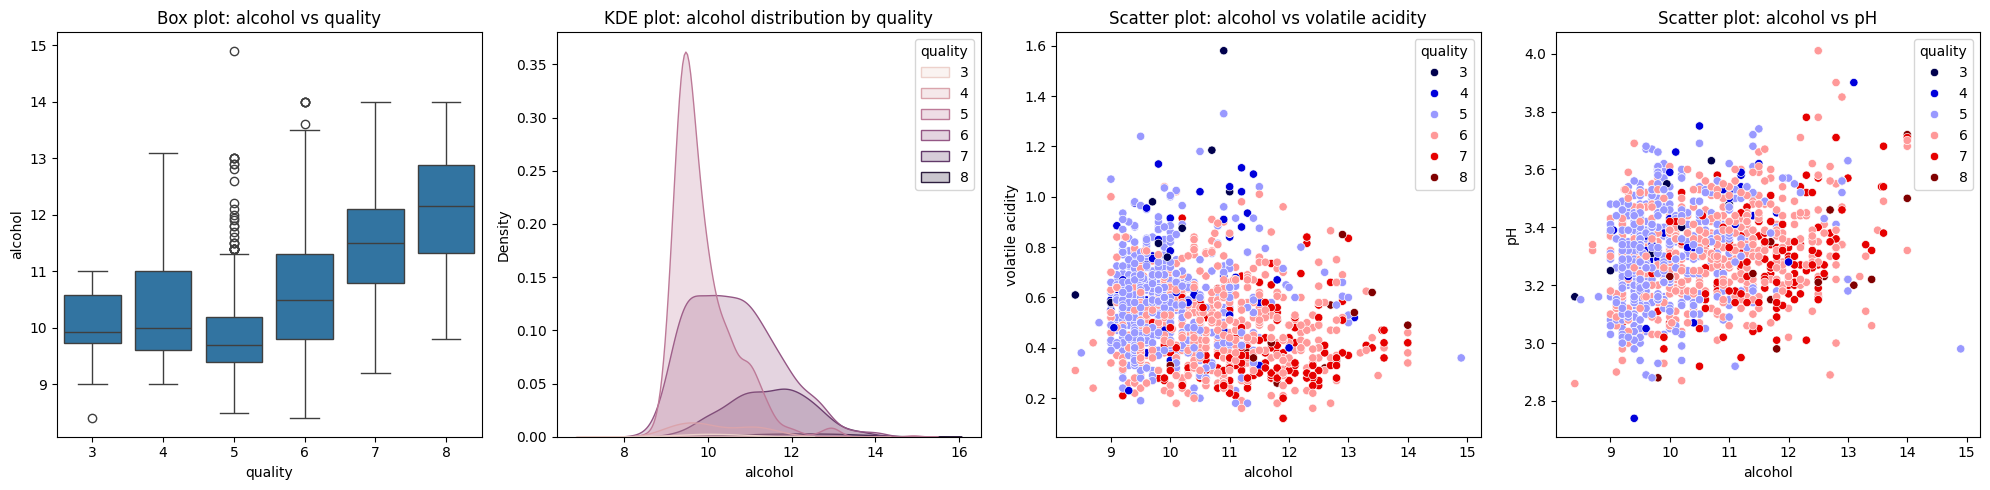

## NEW COMPARISON ## - pH vs quality


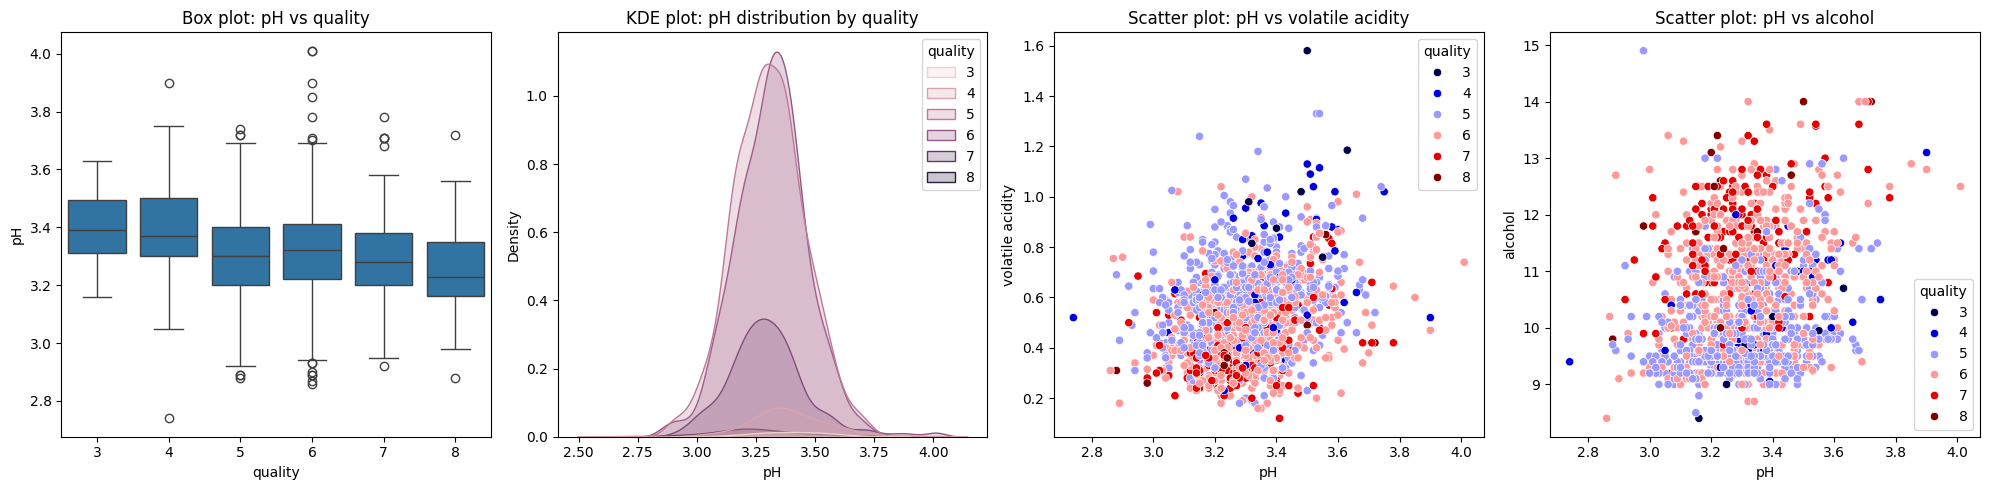

In [3]:
# CODE PARTIALLY GENERATED BY CHATGPT
# modified by instructor to have more features

# List of suspected columns for overlap
# USE SHAP, LIME, phik-matrix, correlation matrix etc to find columns that seems
# probable for having overlap, noise, redundancy, distribution problems and/or outlier problems
# try to keep the amount of variables to a small number at a time, so you don't slow down the
# process of plot generation below
suspected_columns = ['volatile acidity', 'alcohol', 'pH']
target_variable = 'quality'  # The target variable

# Plot size settings
plt.figure(figsize=(10, 6))

# Iterate through suspected columns to generate box plots and scatter plots in a horizontal layout
for feature in suspected_columns:
    print(f"## NEW COMPARISON ## - {feature} vs {target_variable}")
    num_other_features = len([col for col in suspected_columns if col != feature])
    
    # Create a horizontal grid with 1 row and (1 + num_other_features + 1) columns
    fig, axes = plt.subplots(1, 2 + num_other_features, figsize=(5 * (2 + num_other_features), 5))
    
    # First plot: Box plot for the feature against the target variable
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[0])
    axes[0].set_title(f'Box plot: {feature} vs {target_variable}')
    
    # Second plot: KDE plot for the feature, showing distribution by target variable
    sns.kdeplot(x=feature, hue=target_variable, data=df, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE plot: {feature} distribution by {target_variable}')
    
    # Remaining plots: Scatter plots for the feature against every other feature
    for i, other_feature in enumerate([col for col in suspected_columns if col != feature]):
        sns.scatterplot(x=feature, palette="seismic", y=other_feature, hue=target_variable, data=df, ax=axes[i + 2])
        axes[i + 2].set_title(f'Scatter plot: {feature} vs {other_feature}')
    
    # Display the entire row of plots
    plt.tight_layout()
    plt.show()

In [ ]:
# if you study closely, you can see how volatile acidity and alcohol % is connected to wine quality
# alcohol % usually increases quality, while high acidity lowers quality

# if you study the scatterplot volatile acidity vs alcohol vs quality, you can see how often
# wines are mixed up between the average quality classes

# this phenomenon is essentially the main reason why this dataset doesn't work well
# with machine learning without optimizations

There are still way more other tools to optimize and study the data. For example:

Outlier removal (z-score, IQR, Isolation Forest), noise removal (MAD), clustering (KMeans etc.) etc. etc.